# Import required libraries

In [1]:
from pathlib import Path
import math
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

# Load in DSST Curated datasets spreadsheet
[URL to spreadsheet](https://docs.google.com/spreadsheets/d/1t1VtW_ScMunEcrloxIv8197ezHQXCZQq_dxsSrH7SQI/edit#gid=0)

In [2]:
data = Path('DSST-Curated-Datasets-Public-Sheet1.tsv')
df = pd.read_csv(data, sep='\t', na_values=' ', keep_default_na=False)
df

,Study ID,Dataset,DSST Curation Status,Path on NIH HPC,Data Use Agreement,Number of Subjects,Sample Size,Modalities,Min Age,Max Age,Age Spread,Download Date,Current Release Date,Initial Release Date,func tasks,Comments,Publication,Dataset Name,Dataset Link
0,UKBB,UK Biobank,Processed,/data/Ukbb_DSST ; /data/Ukbb_proc,SIgning Official,"40,000","41,500","anat,func,dwi,genetic",40,69,29,04/25/2020,10/01/15,09/01/2019,"rest,emotion,vision","Eventually 100,000 subjects with genetics, 1.5...",https://www.nature.com/articles/nn.4393,UK Biobank,https://www.ukbiobank.ac.uk/
1,ABCD,Adolescent Brain Cognitive Development,Processed,/data/ABCD_DSST,SIgning Official,"12,000","12,000","anat,func,dwi,genetic",9,20,11,09/29/2019,03/26/19,06/28/2017,"rest,reward,executive function,emotion,working...",Eventually longitidinal following 10k adolesce...,https://doi.org/10.1093/cercor/bhz257,Adolescent Brain Cognitive Development,https://abcdstudy.org/about/
2,PNC,Philadelphia Neurodevelopmental Cohort,Processed,/data/DSST_dua/PNC,Signing Official,"9,500","9,500","anat,func,dwi,genetic",8,21,13,,02/27/2017,07/12/2012,"rest,emotion,working memory",Participants with diverse medical conditions: ...,10.1016/j.neuroimage.2013.07.064,Philadelphia Neurodevelopmental Cohort,https://www.med.upenn.edu/bbl/philadelphianeur...
3,OpenNeuro,OpenNeuro,Processed,/data/DSST/openneuro,None,"3,568","4,250","anat, func, dwi",,,,12/23/2019,,,multiple,Repsitory of multiple (and typically smaller) ...,,OpenNeuro,http://openneuro.org
4,OpenFMRI,OpenFMRI,Processed,/data/DSST/Openfmri,None,"3,122","4,300","anat, func, dwi",,,,12/23/2019,,,multiple,Repsitory of multiple (and typically smaller) ...,,OpenFMRI,https://openfmri.org/
5,HBN,Healthy Brain Network,Processed,/data/DSST_dua/CMI,Click Through,"2,000","2,000","anat,func,dwi,eeg,genetic",5,21,16,10/18/2019,09/17/2019,06/14/2017,"rest,movie",Goal of 10k children with a variety of concern...,https://www.nature.com/articles/sdata2017181,Healthy Brain Network,http://fcon_1000.projects.nitrc.org/indi/cmi_h...
6,CoRR,Consortium for Reliability and Reproducabilty ...,Processed,/data/DSST/CoRR,Implicit,"1,700","6,434","anat,func,dwi",6,62,56,12/23/2019,12/09/2014,12/09/2014,rest,Large sample across multiple sites to facilita...,https://www.nature.com/articles/sdata201449,Consortium for Reliability and Reproducabilty ...,http://fcon_1000.projects.nitrc.org/indi/CoRR/...
7,GSP,Brain Genomics Superstruct Project,Processed,/data/DSST/GSP,Implicit,"1,500","1,500","anat,func",18,35,17,12/23/2019,,12/12/2012,rest,One or more rest scan per subject,https://www.nature.com/articles/sdata201531,Brain Genomics Superstruct Project,https://www.neuroinfo.org/gsp/
8,NKI-RS,Enhanced Nathan Kline Institute - Rockland Sample,Processed,/data/DSST/Enhanced-NKI-RS,Implicit,"1,334","2,325","anat, func, dwi",6,85,79,05/27/2020,02/08/2019,10/16/2012,"rest, visual checkerboard, breath hold",,https://pubmed.ncbi.nlm.nih.gov/23087608/,Enhanced Nathan Kline Institute - Rockland Sample,https://fcon_1000.projects.nitrc.org/indi/enha...
9,FCON,Functional Connectomes Project,Processed,/data/DSST/FCON,Implicit,"1,255","6,495","anat,func",7,80,73,01/10/2020,12/23/2009,10/12/2009,rest,"Collected across 33 different sites, basic phe...",https://www.ncbi.nlm.nih.gov/pubmed/20176931,Functional Connectomes Project,http://fcon_1000.projects.nitrc.org/fcpClassic...


# Creating a mask for desired wordcloud shape

In [3]:
# word cloud shape mask
head_mask = np.array(Image.open('head.png'))

# WordCloud 1: Dataset & Sample Size

In [5]:
sub_df = df[['Dataset', 'Sample Size']]
for i, v in sub_df['Sample Size'].items():
    # converting from python object to int and then applying log base 2
    sub_df.at[i, 'Sample Size'] = round(math.log(int(str(v).replace(',', '')), 2), 3)

In [6]:
sub_df

,Dataset,Sample Size
0,UK Biobank,15.341
1,Adolescent Brain Cognitive Development,13.551
2,Philadelphia Neurodevelopmental Cohort,13.214
3,OpenNeuro,12.053
4,OpenFMRI,12.07
5,Healthy Brain Network,10.966
6,Consortium for Reliability and Reproducabilty ...,12.652
7,Brain Genomics Superstruct Project,10.551
8,Enhanced Nathan Kline Institute - Rockland Sample,11.183
9,Functional Connectomes Project,12.665


In [7]:
# creating a dictionary with dataset name as key and sample size (log scale base 2) as value
dataset_sample_size = dict(zip(sub_df['Dataset'].tolist(), sub_df['Sample Size'].tolist()))
dataset_sample_size

{'UK Biobank': 15.341,
 'Adolescent Brain Cognitive Development': 13.551,
 'Philadelphia Neurodevelopmental Cohort': 13.214,
 'OpenNeuro': 12.053,
 'OpenFMRI': 12.07,
 'Healthy Brain Network': 10.966,
 'Consortium for Reliability and Reproducabilty (CoRR)': 12.652,
 'Brain Genomics Superstruct Project': 10.551,
 'Enhanced Nathan Kline Institute - Rockland Sample': 11.183,
 'Functional Connectomes Project': 12.665,
 'Human Connectome Project - Young Adult': 10.229,
 'Autism Brain Imaging Data Exchange 2': 10.17,
 'Autism Brain Imaging Data Exchange 1': 10.119,
 'ADHD-200': 9.644,
 'NIMH IRP Longitudinal Development T1w Dataset': 10.566,
 'Human Connectome Project - Development': 9.229,
 'Human Connectome Project - Aging': 9.229,
 'Southwest U. Longitudinal Imaging Multimodal (SLIM)': 10.033,
 'Self Regulation Ontology': 9.028,
 'Developing Human Connectome Project': 9.124,
 'Baby Connectome Project': 9.604,
 'Southwest University Adult Lifespan Dataset (SALD)': 8.966,
 'NIMH/NHGRI Data 

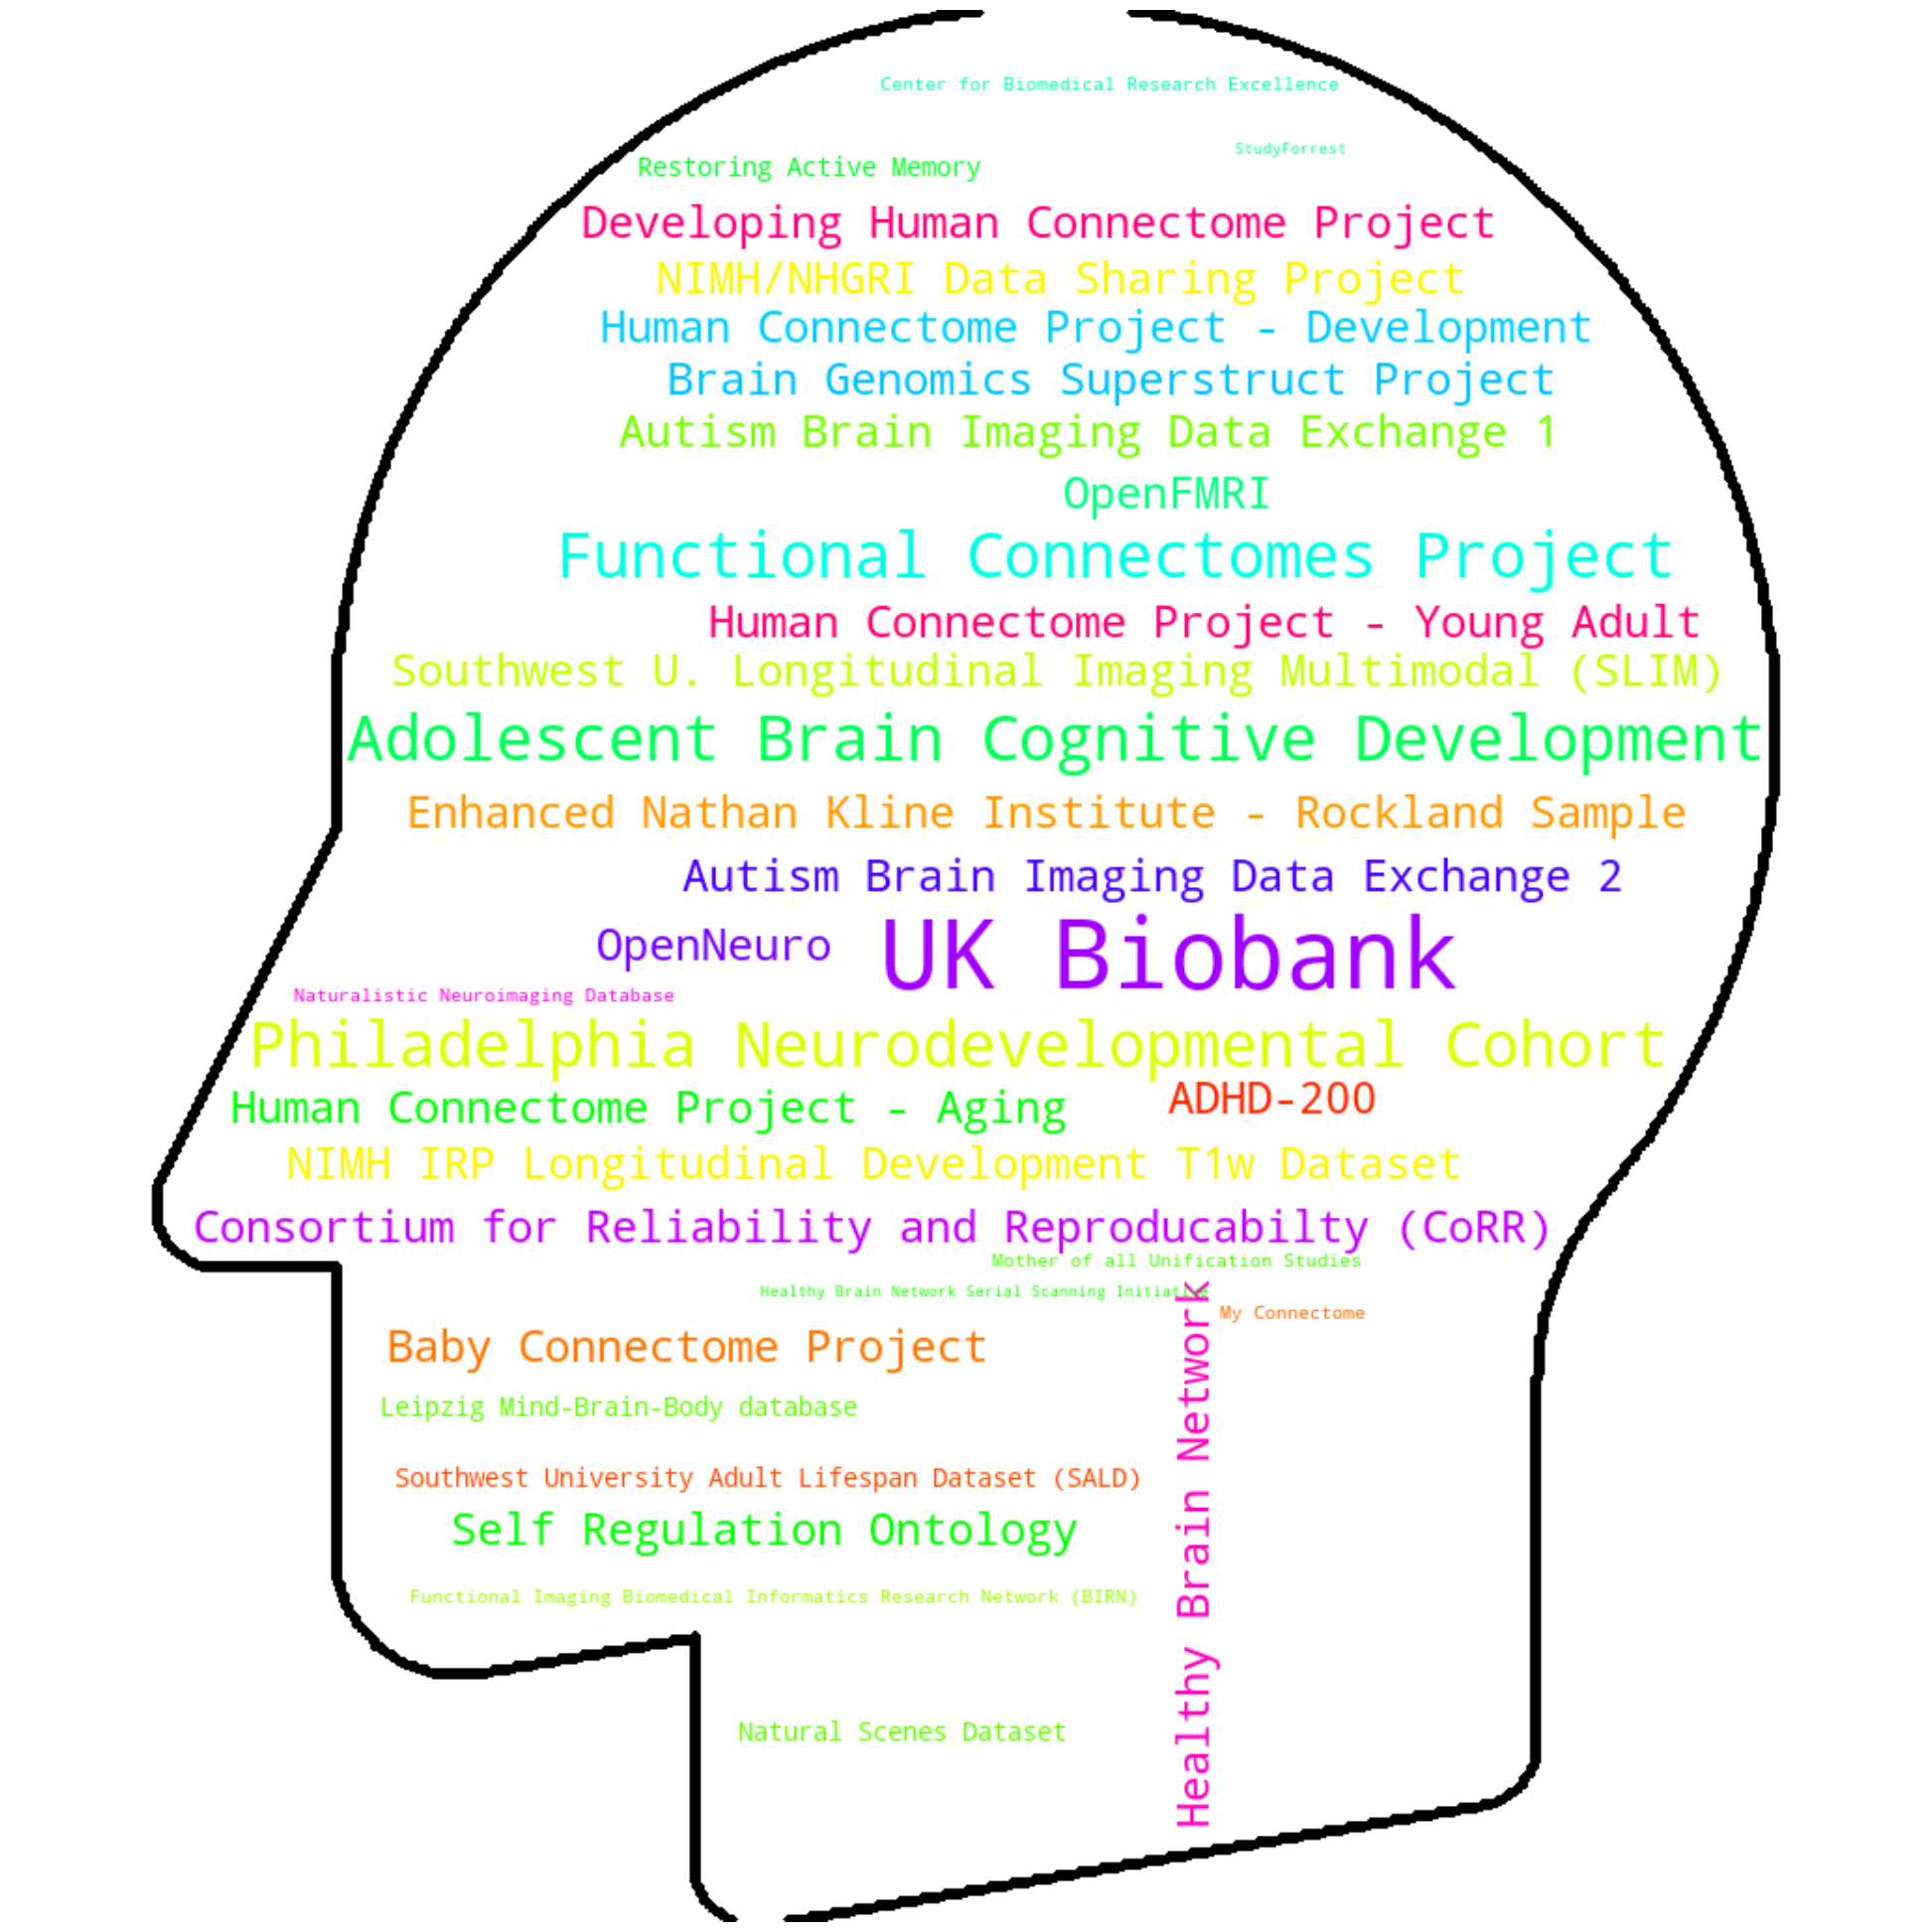

In [9]:
# White background
wc1_whitebg = WordCloud(background_color='white', scale=2, colormap='hsv', contour_color='black', contour_width=5,
                        mask=head_mask).generate_from_frequencies(dataset_sample_size)

plt.figure(figsize=(25, 25))
plt.imshow(wc1_whitebg, interpolation='bilinear')
plt.axis('off')
plt.show()

wc1_whitebg.to_file("wordclouds/dataset_sampleSize_whitebg_logscale.png")  # saving to file

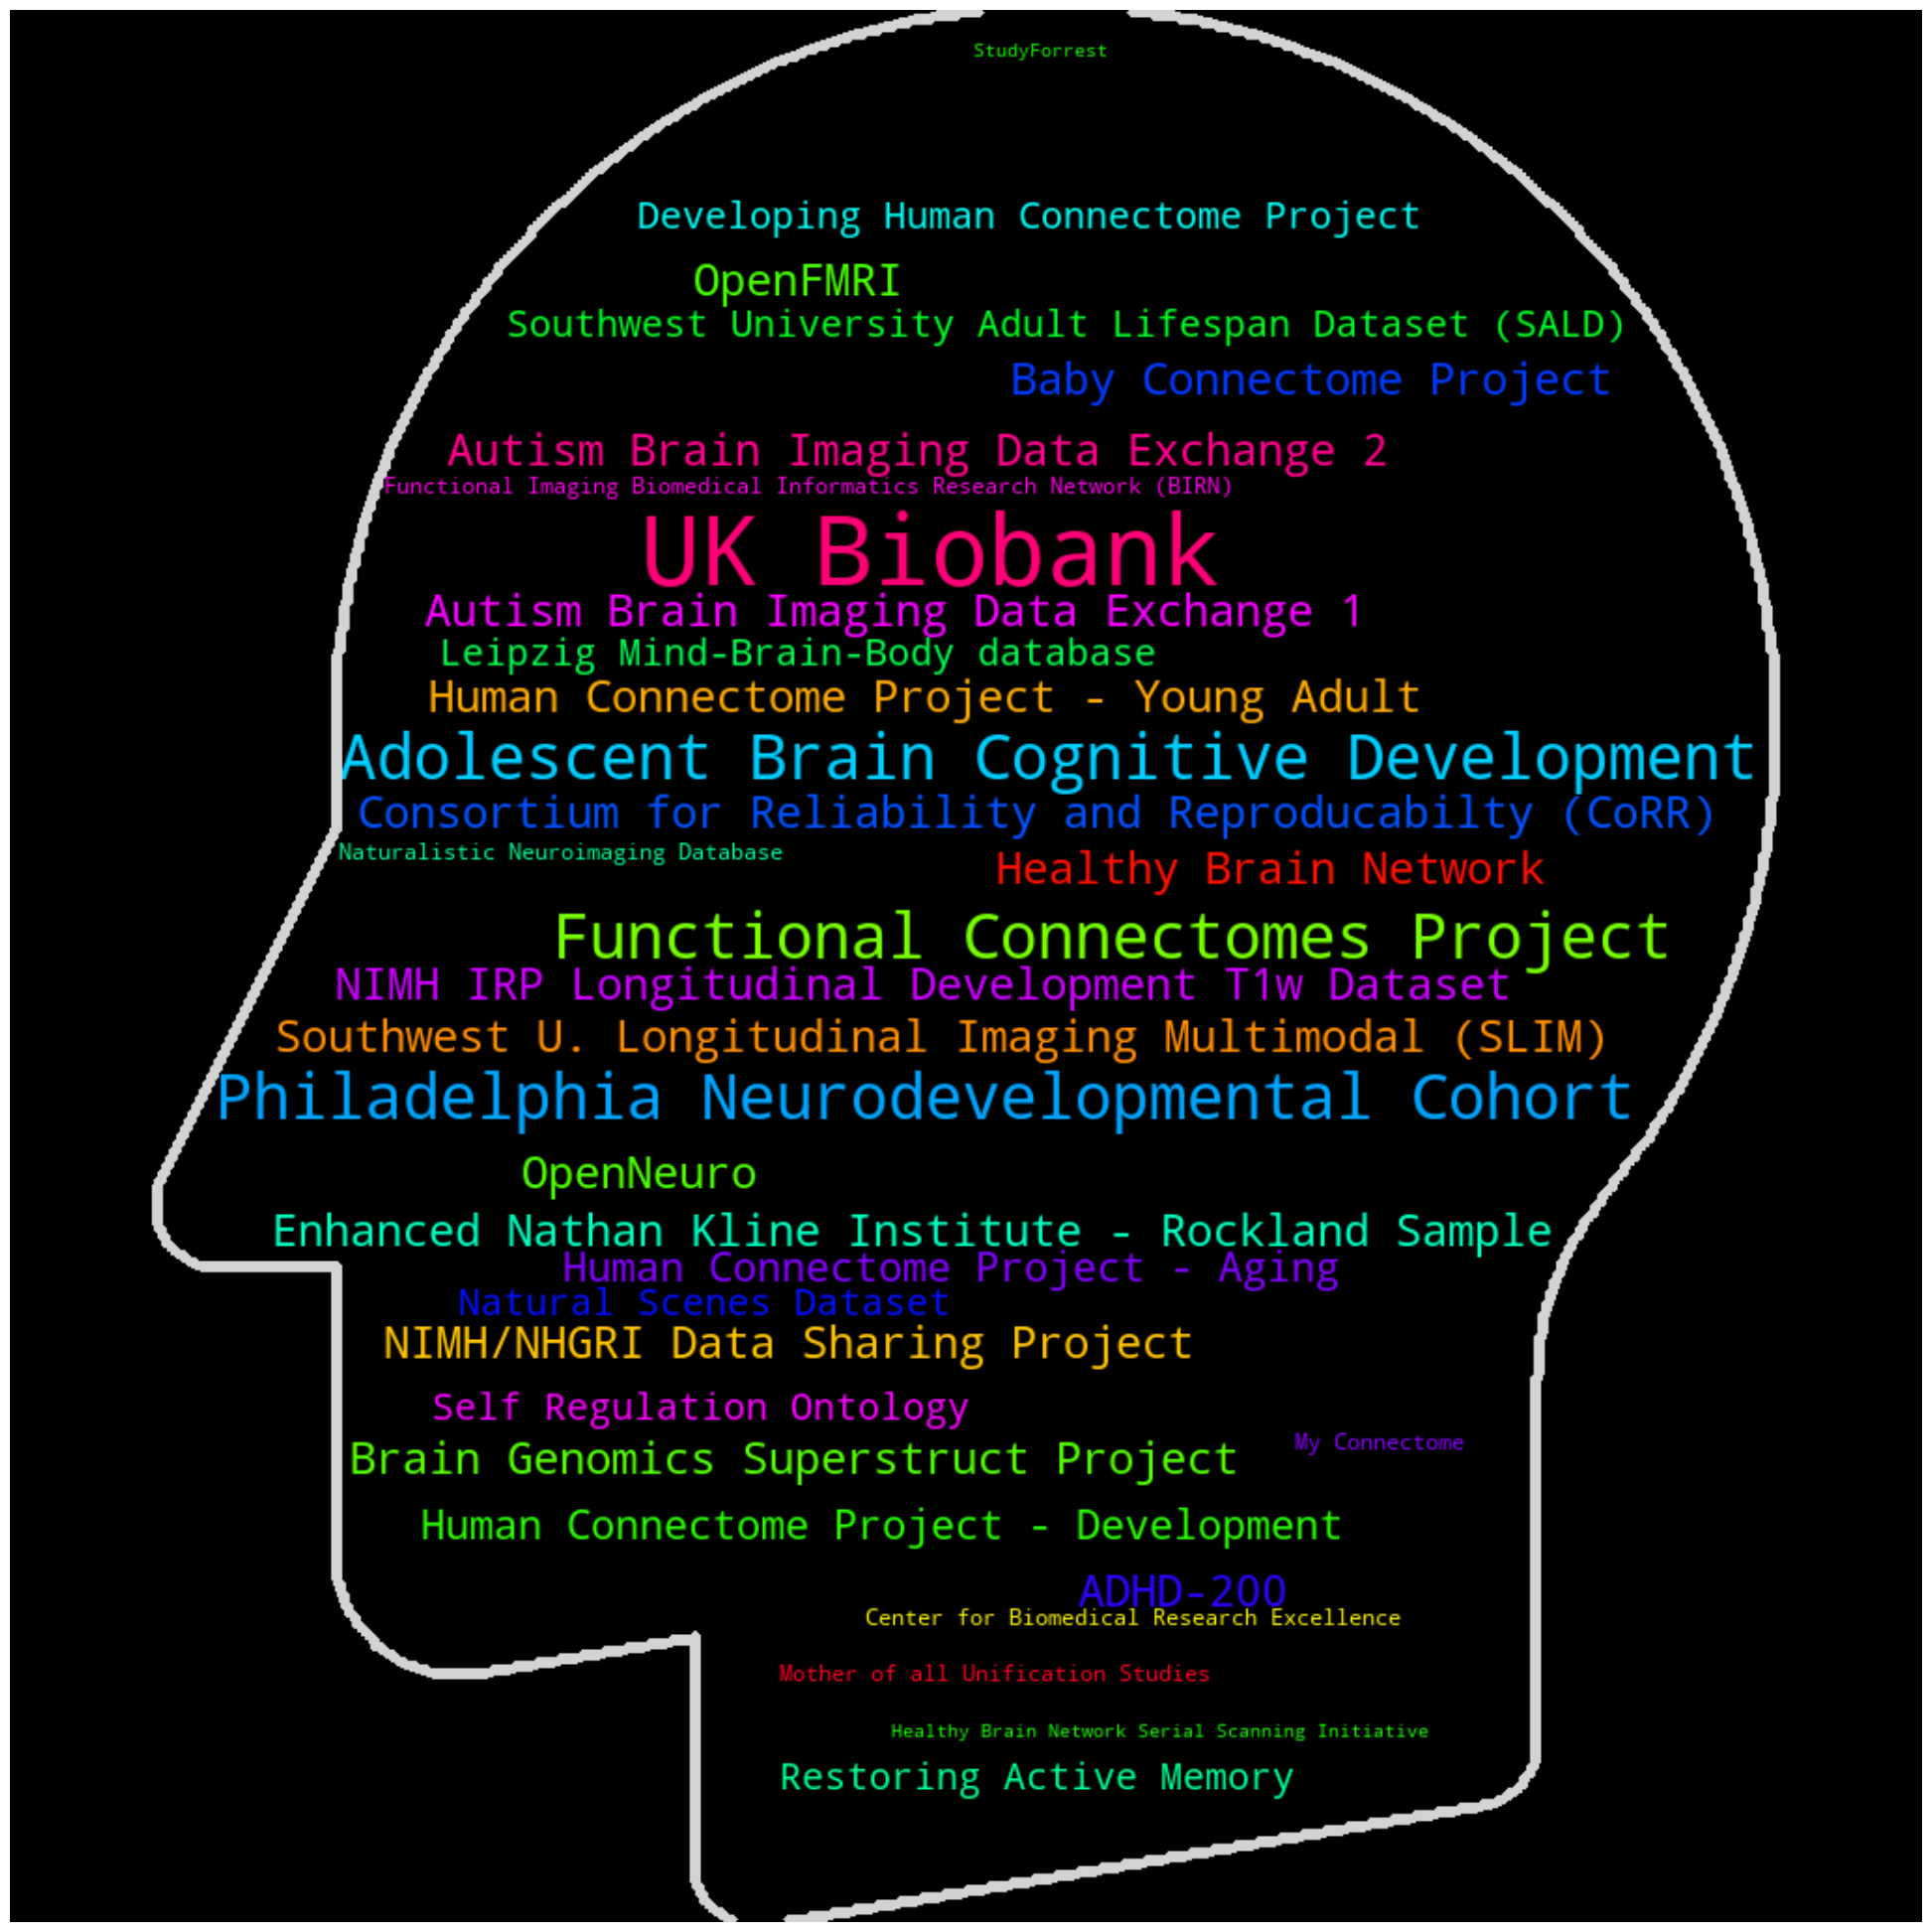

In [10]:
# Black background
wc1_blackbg = WordCloud(background_color='black', scale=2, colormap='hsv', contour_color='lightgrey', contour_width=5,
                        mask=head_mask).generate_from_frequencies(dataset_sample_size)

plt.figure(figsize=(25, 25))
plt.imshow(wc1_blackbg, interpolation='bilinear')
plt.axis('off')
plt.show()

wc1_blackbg.to_file("wordclouds/dataset_sampleSize_blackbg_logscale.png")  # saving to file

# Word Cloud 2: Modality frequencies

In [11]:
# creating frequency count dictionary
modality_counts = dict()
for idx, mod_str in df['Modalities'].items():
    mod_list = mod_str.split(',')
    for mod in mod_list:
        if mod.strip() not in modality_counts.keys():
            modality_counts[mod.strip()] = 1
        else:
            modality_counts[mod.strip()] += 1
print(modality_counts)


{'anat': 32, 'func': 30, 'dwi': 19, 'genetic': 5, 'eeg': 2, 'meg': 2, 'beh': 2, 'ecog': 1, 'physio': 1}


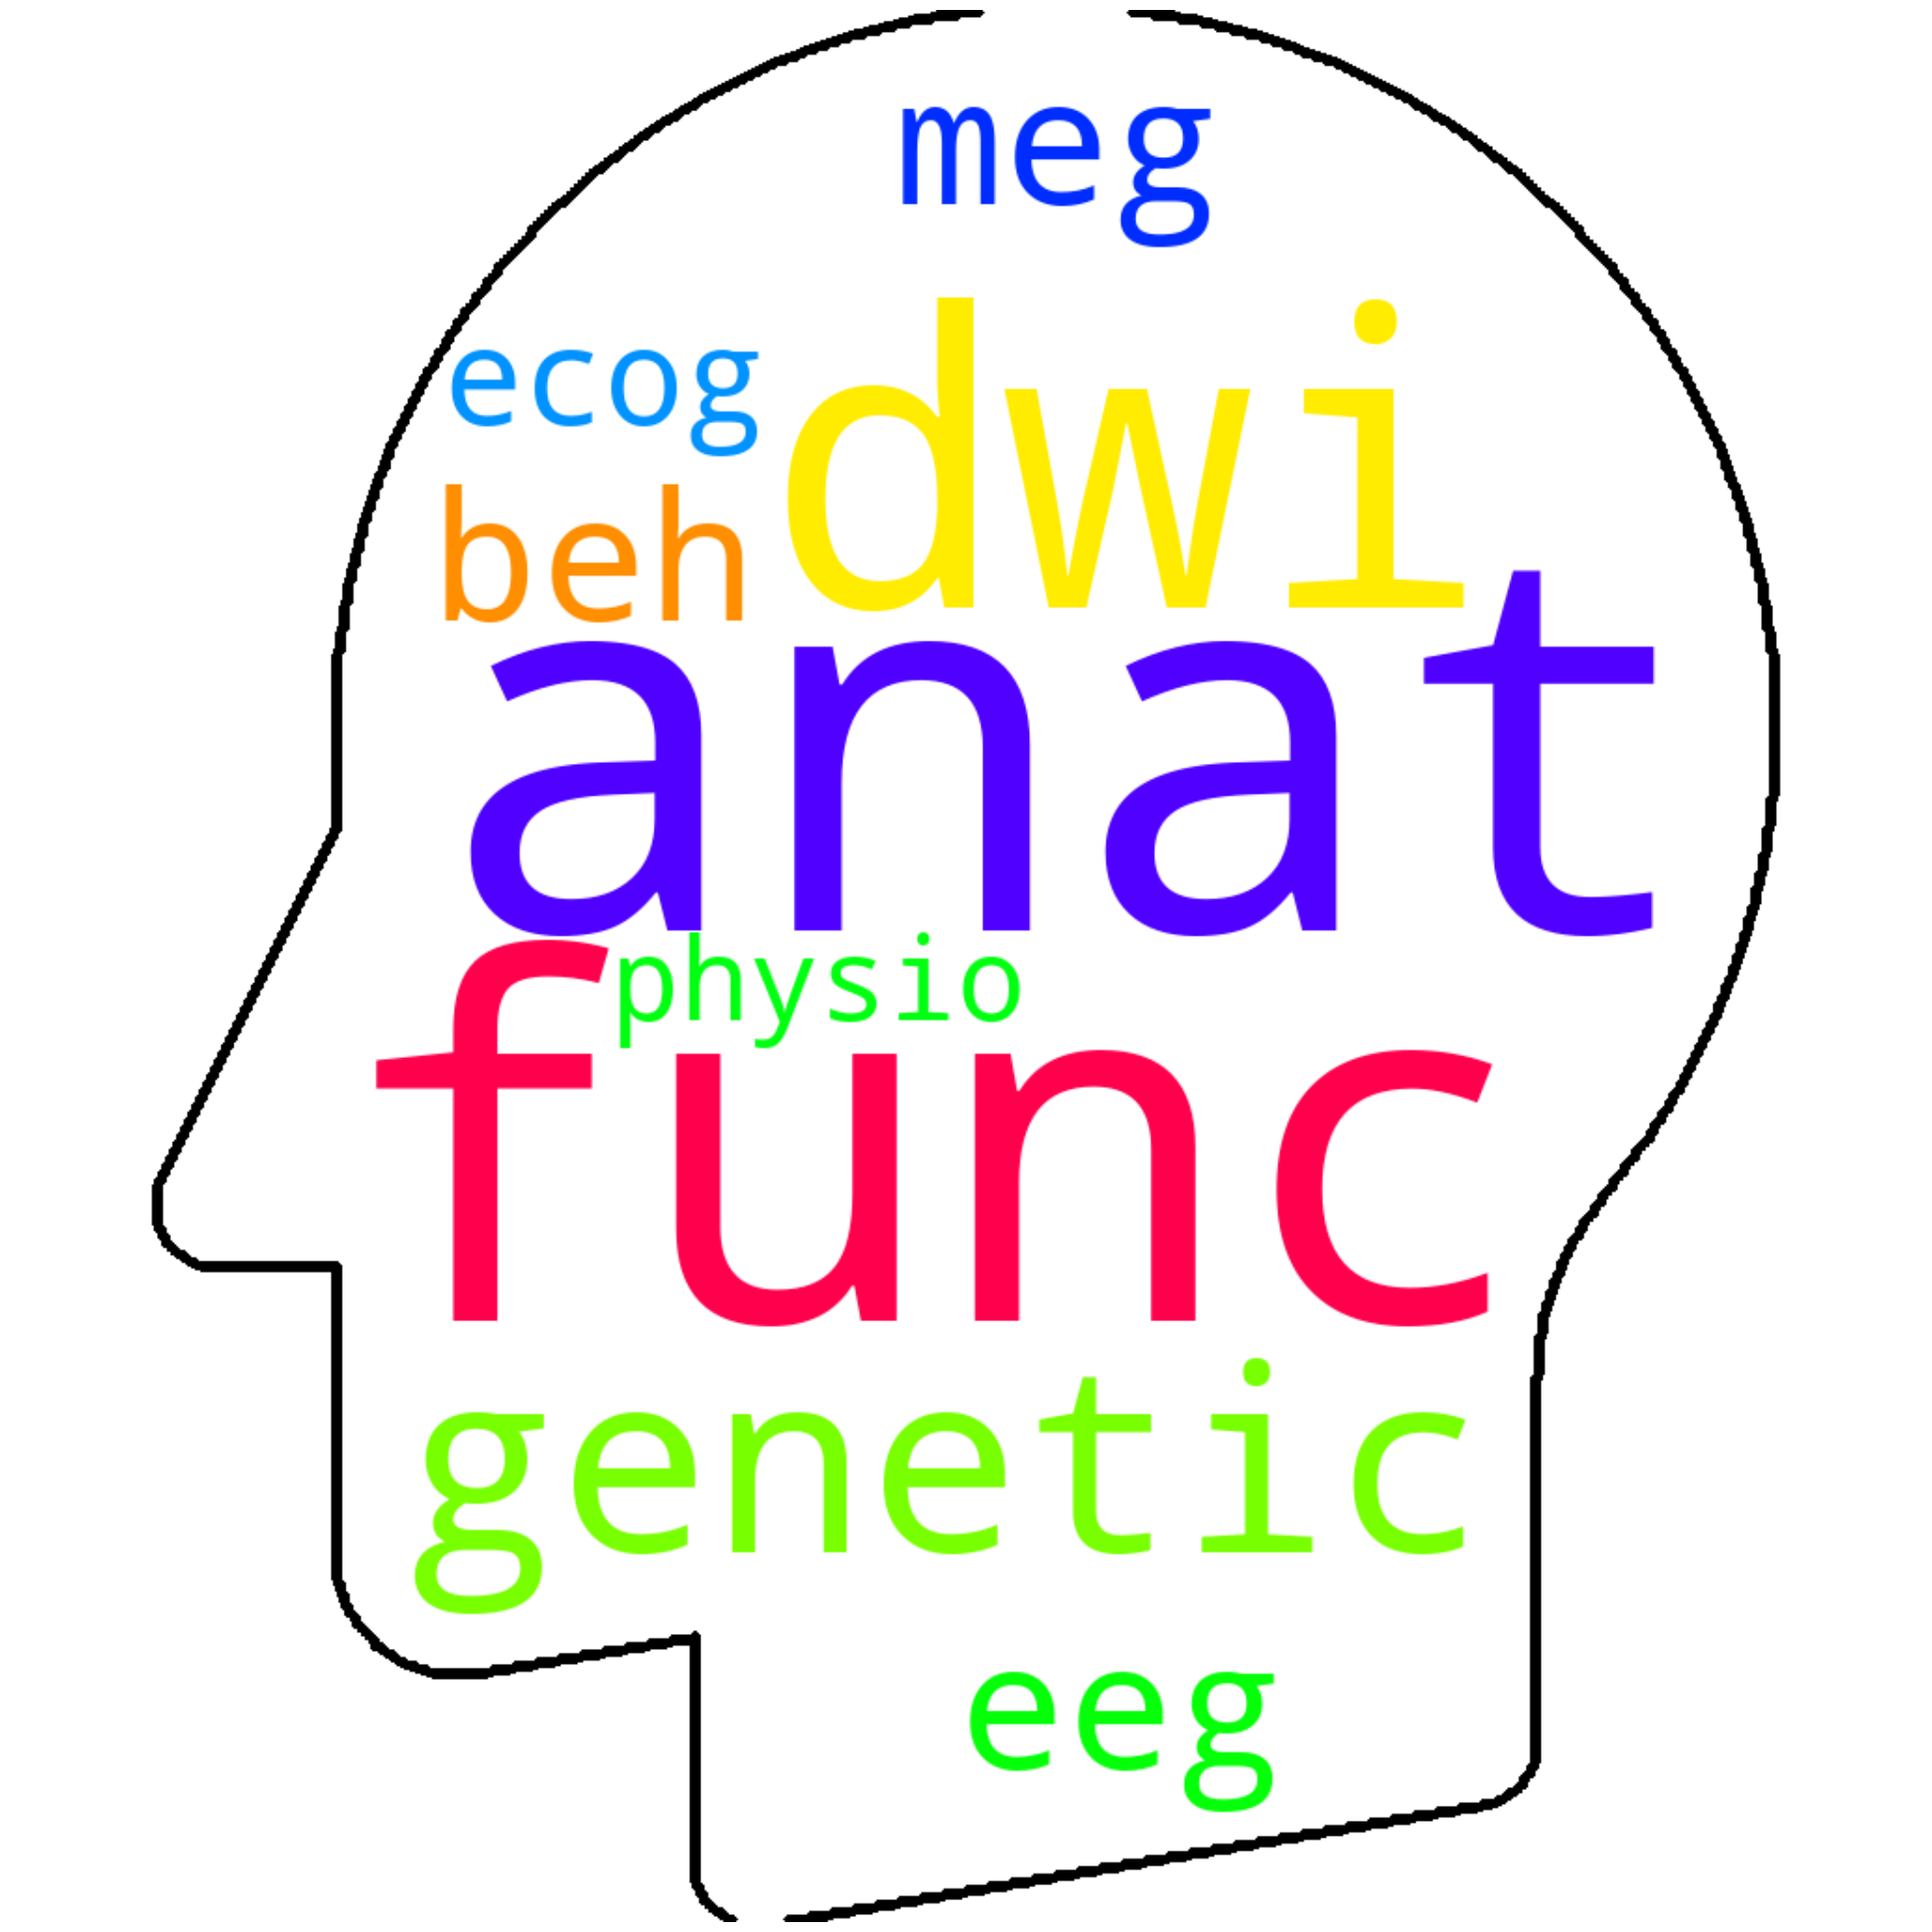

In [15]:
# White background
wc2_whitebg = WordCloud(background_color='white', scale=2, colormap='hsv', contour_color='black', contour_width=5,
                        mask=head_mask).generate_from_frequencies(modality_counts)

plt.figure(figsize=(25, 25))
plt.imshow(wc2_whitebg, interpolation='bilinear')
plt.axis('off')
plt.show()

wc2_whitebg.to_file("wordclouds/modality_freq_whitebg.png")

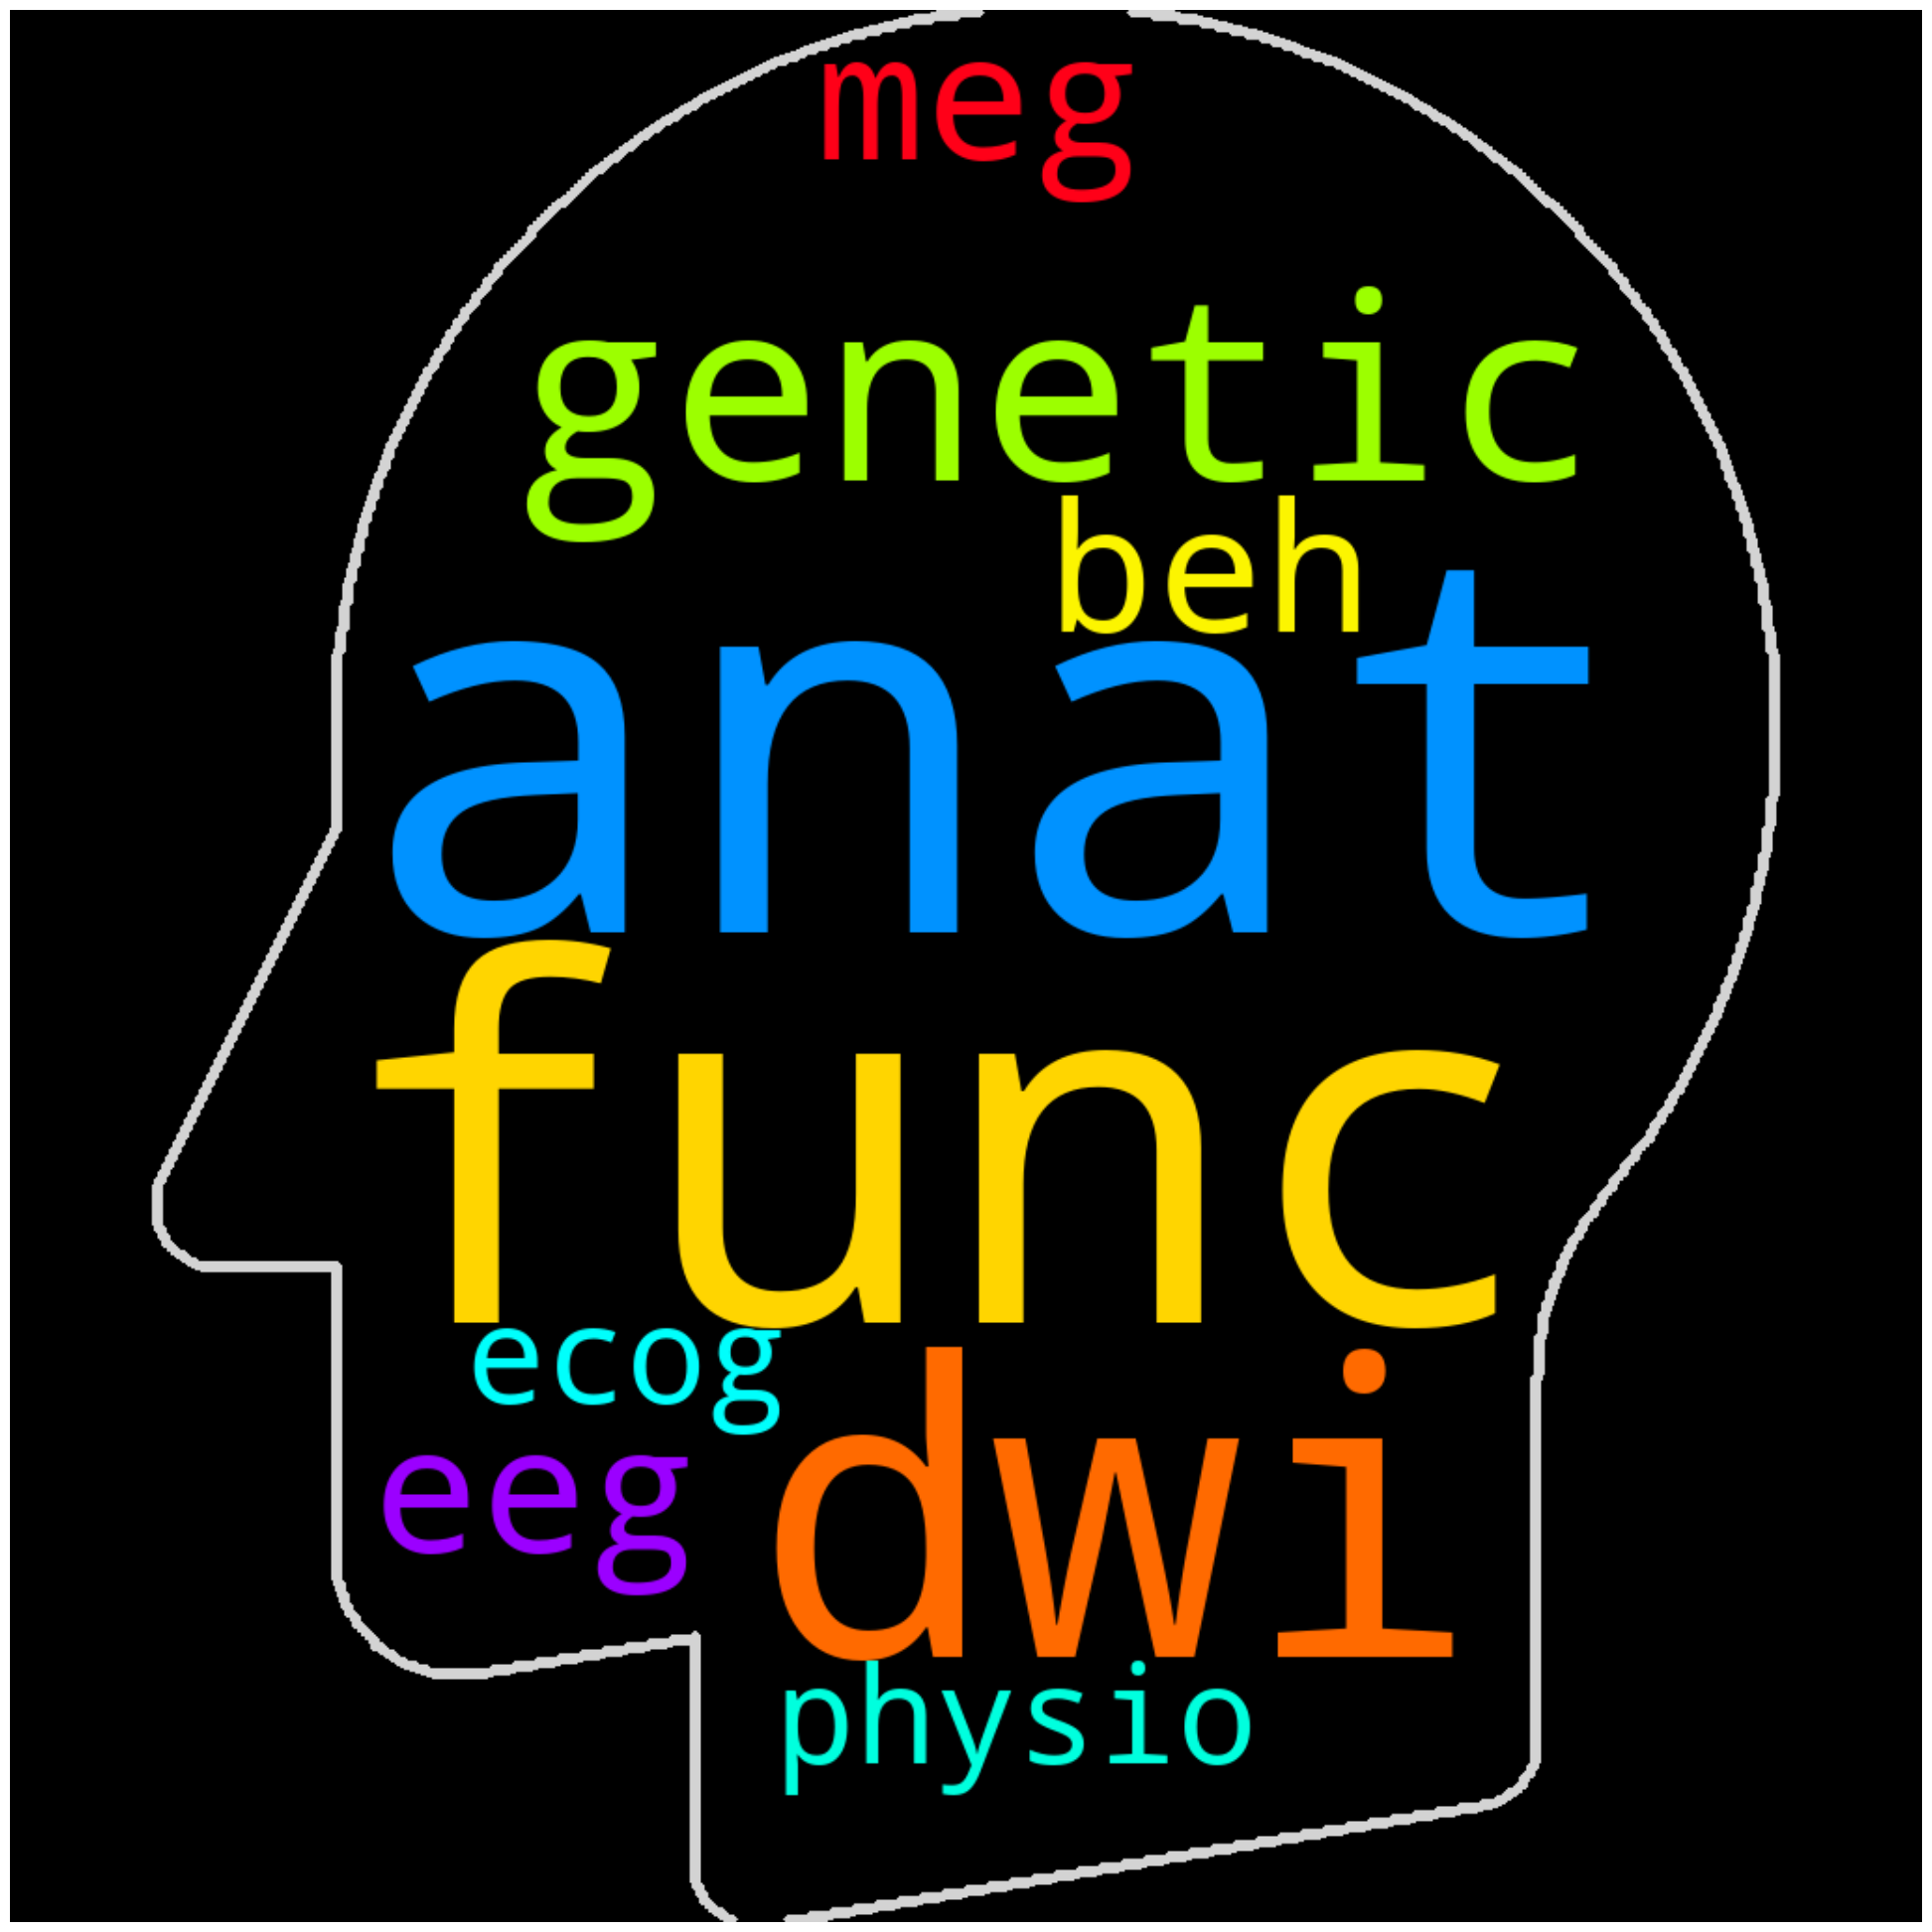

In [16]:
# Black background
wc2_blackbg = WordCloud(background_color='black', scale=2, colormap='hsv', contour_color='lightgrey', contour_width=5,
                        mask=head_mask).generate_from_frequencies(modality_counts)

plt.figure(figsize=(25, 25))
plt.imshow(wc2_blackbg, interpolation='bilinear')
plt.axis('off')
plt.show()

wc2_blackbg.to_file("wordclouds/modality_freq_blackbg.png")  # saving to file

# WordCloud 3: Study ID & Sample Size

In [17]:
studyid_samplesize = dict(zip(df['Study ID'].tolist(), sub_df['Sample Size'].tolist()))
studyid_samplesize


{'UKBB': 15.341,
 'ABCD': 13.551,
 'PNC': 13.214,
 'OpenNeuro': 12.053,
 'OpenFMRI': 12.07,
 'HBN': 10.966,
 'CoRR': 12.652,
 'GSP': 10.551,
 'NKI-RS ': 11.183,
 'FCON': 12.665,
 'HCP': 10.229,
 'ABIDE2': 10.17,
 'ABIDE1': 10.119,
 'ADHD200': 9.644,
 'NILD': 10.566,
 'HCP-Dev': 9.229,
 'HCP-Age': 9.229,
 'SLIM': 10.033,
 'SRO': 9.028,
 'dHCP': 9.124,
 'BCP': 9.604,
 'SALD': 8.966,
 'NNDSP': 10.551,
 'RAM': 7.966,
 'MPI-LEMON': 7.833,
 'FBIRN': 7.788,
 'MOUS': 7.672,
 'COBRE ': 7.524,
 'NND': 6.426,
 'Forrest': 4.322,
 'HBN-SSI': 3.7,
 'NSD': 8.322,
 'MyCon': 6.644}

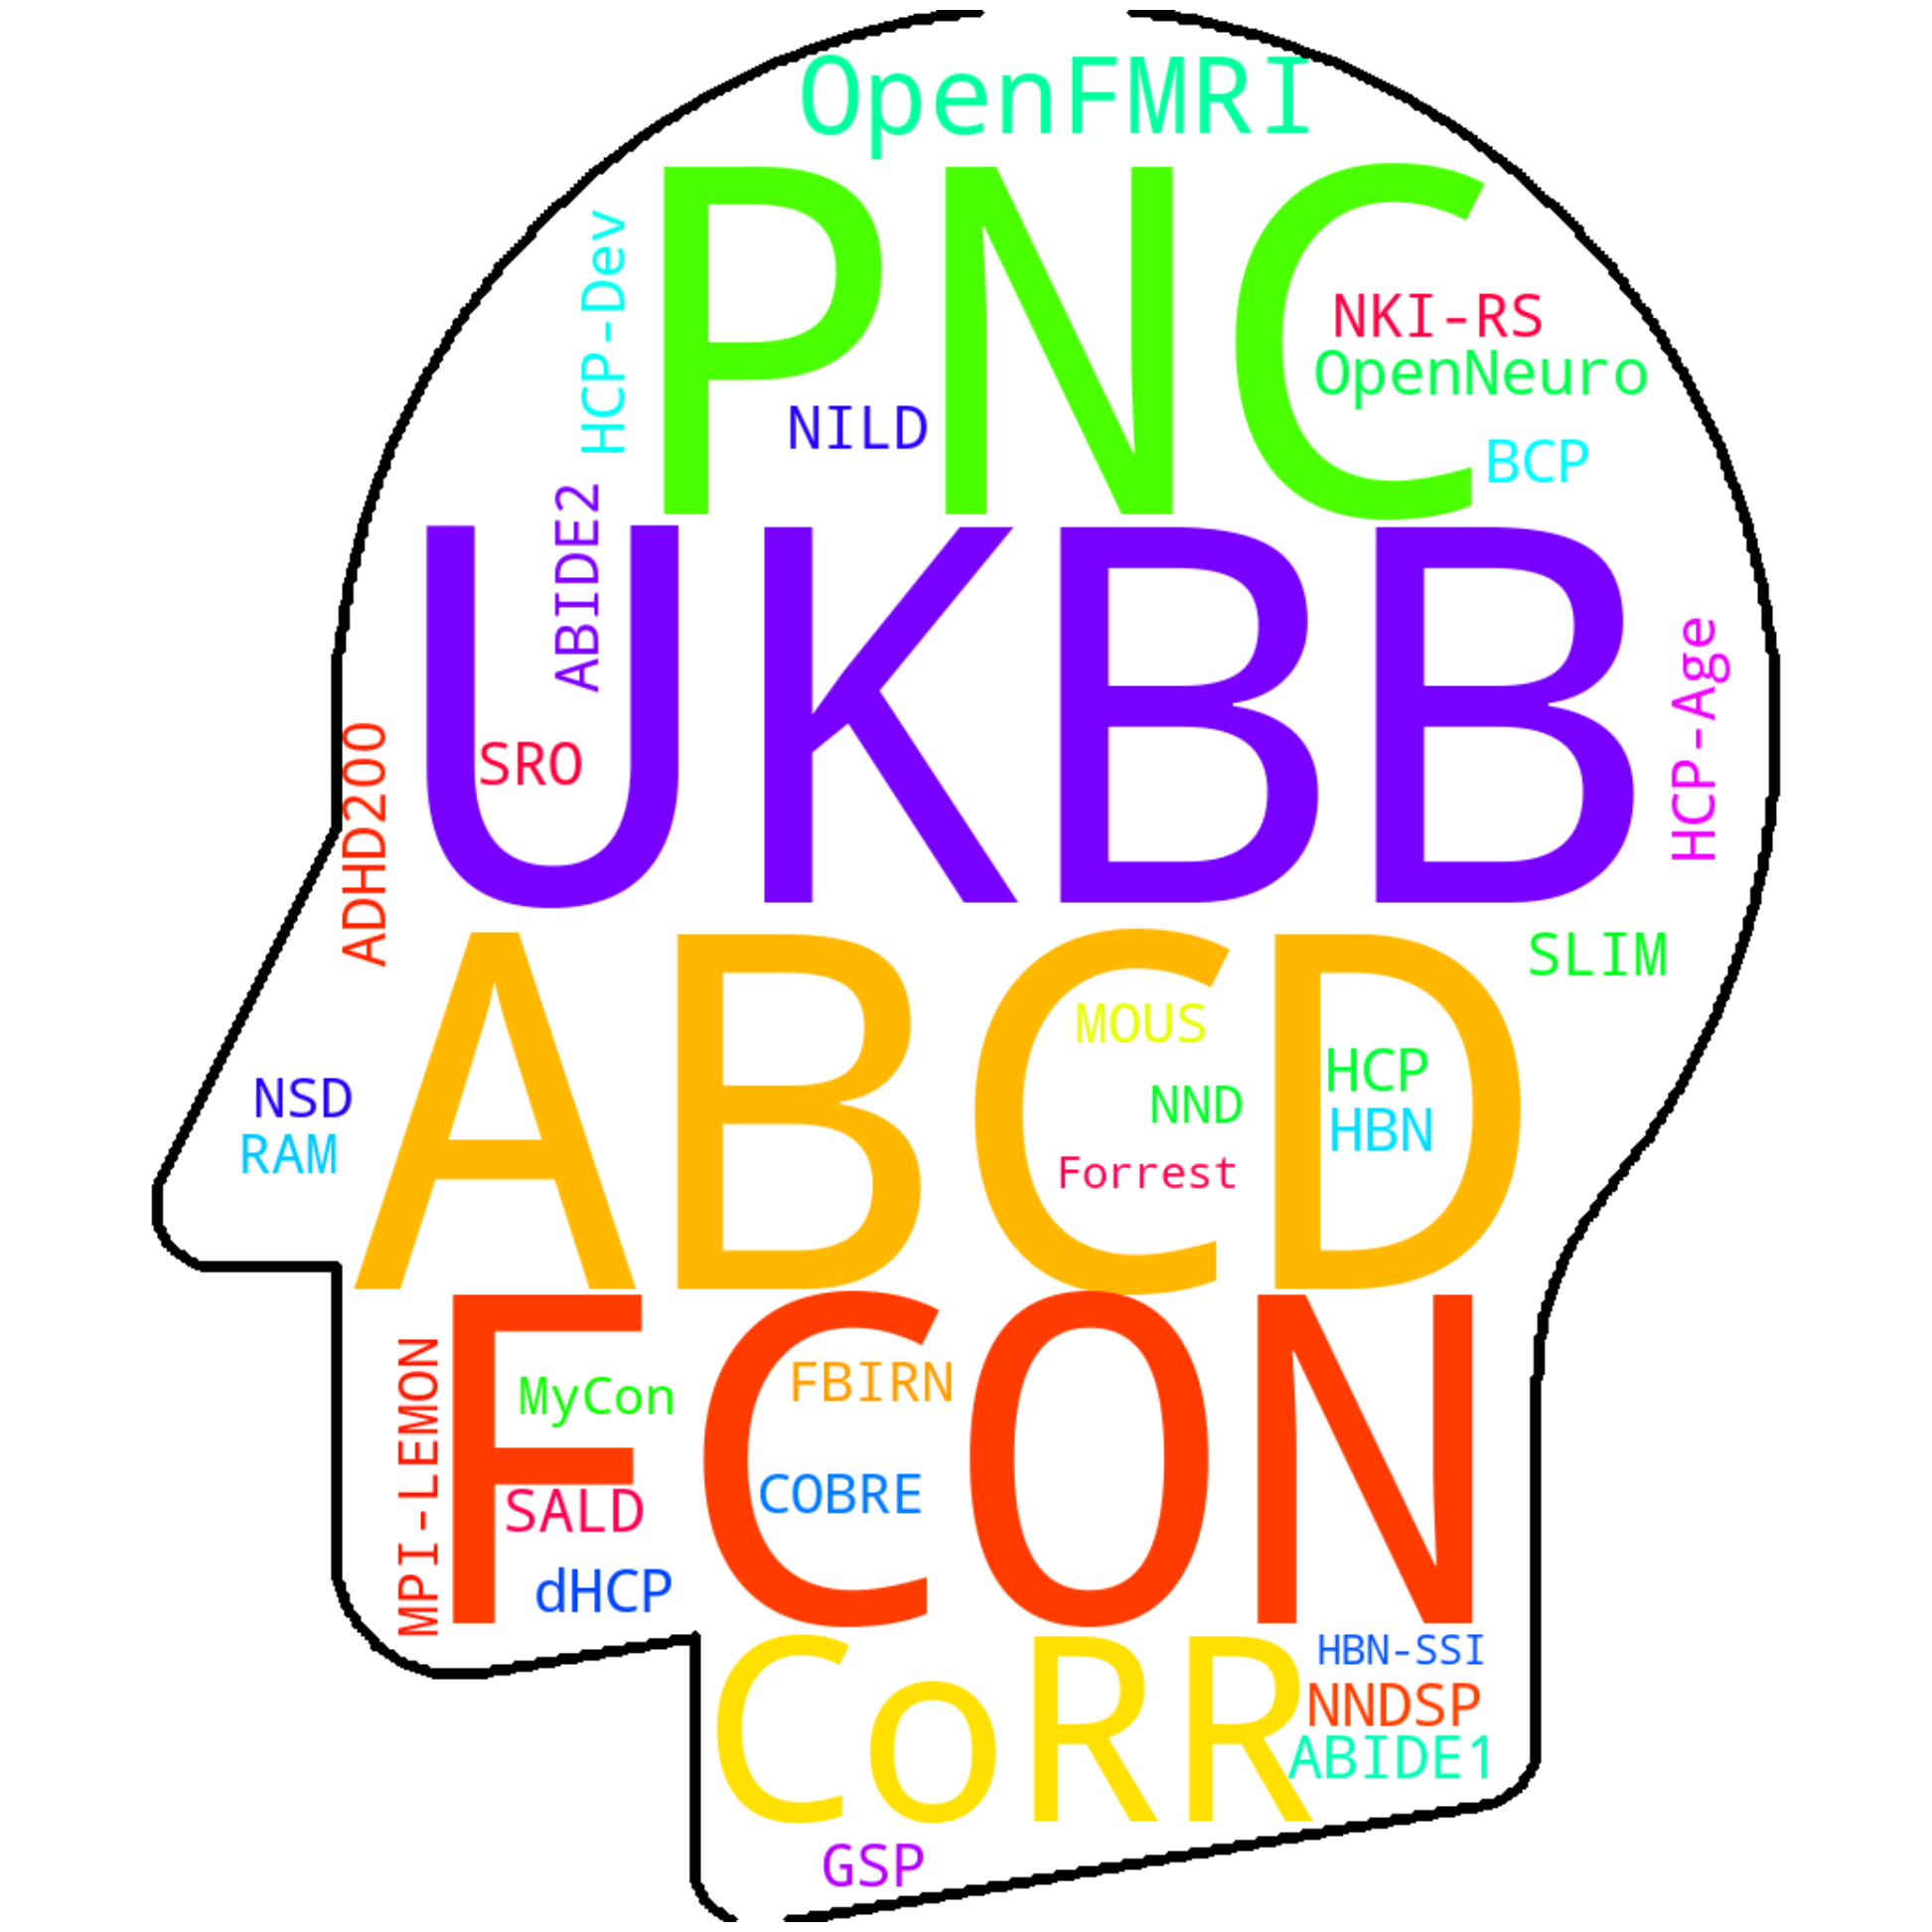

In [18]:
# wordcloud in white bg
wc3_whitebg = WordCloud(background_color='white', scale=2, colormap='hsv', contour_color='black', contour_width=5,
                        mask=head_mask).generate_from_frequencies(studyid_samplesize)
plt.figure(figsize=(25, 25))
plt.imshow(wc3_whitebg, interpolation='bilinear')
plt.axis('off')
plt.show()

wc3_whitebg.to_file('wordclouds/studyid_sampleSize_whitebg_logscale.png')  # saving to file

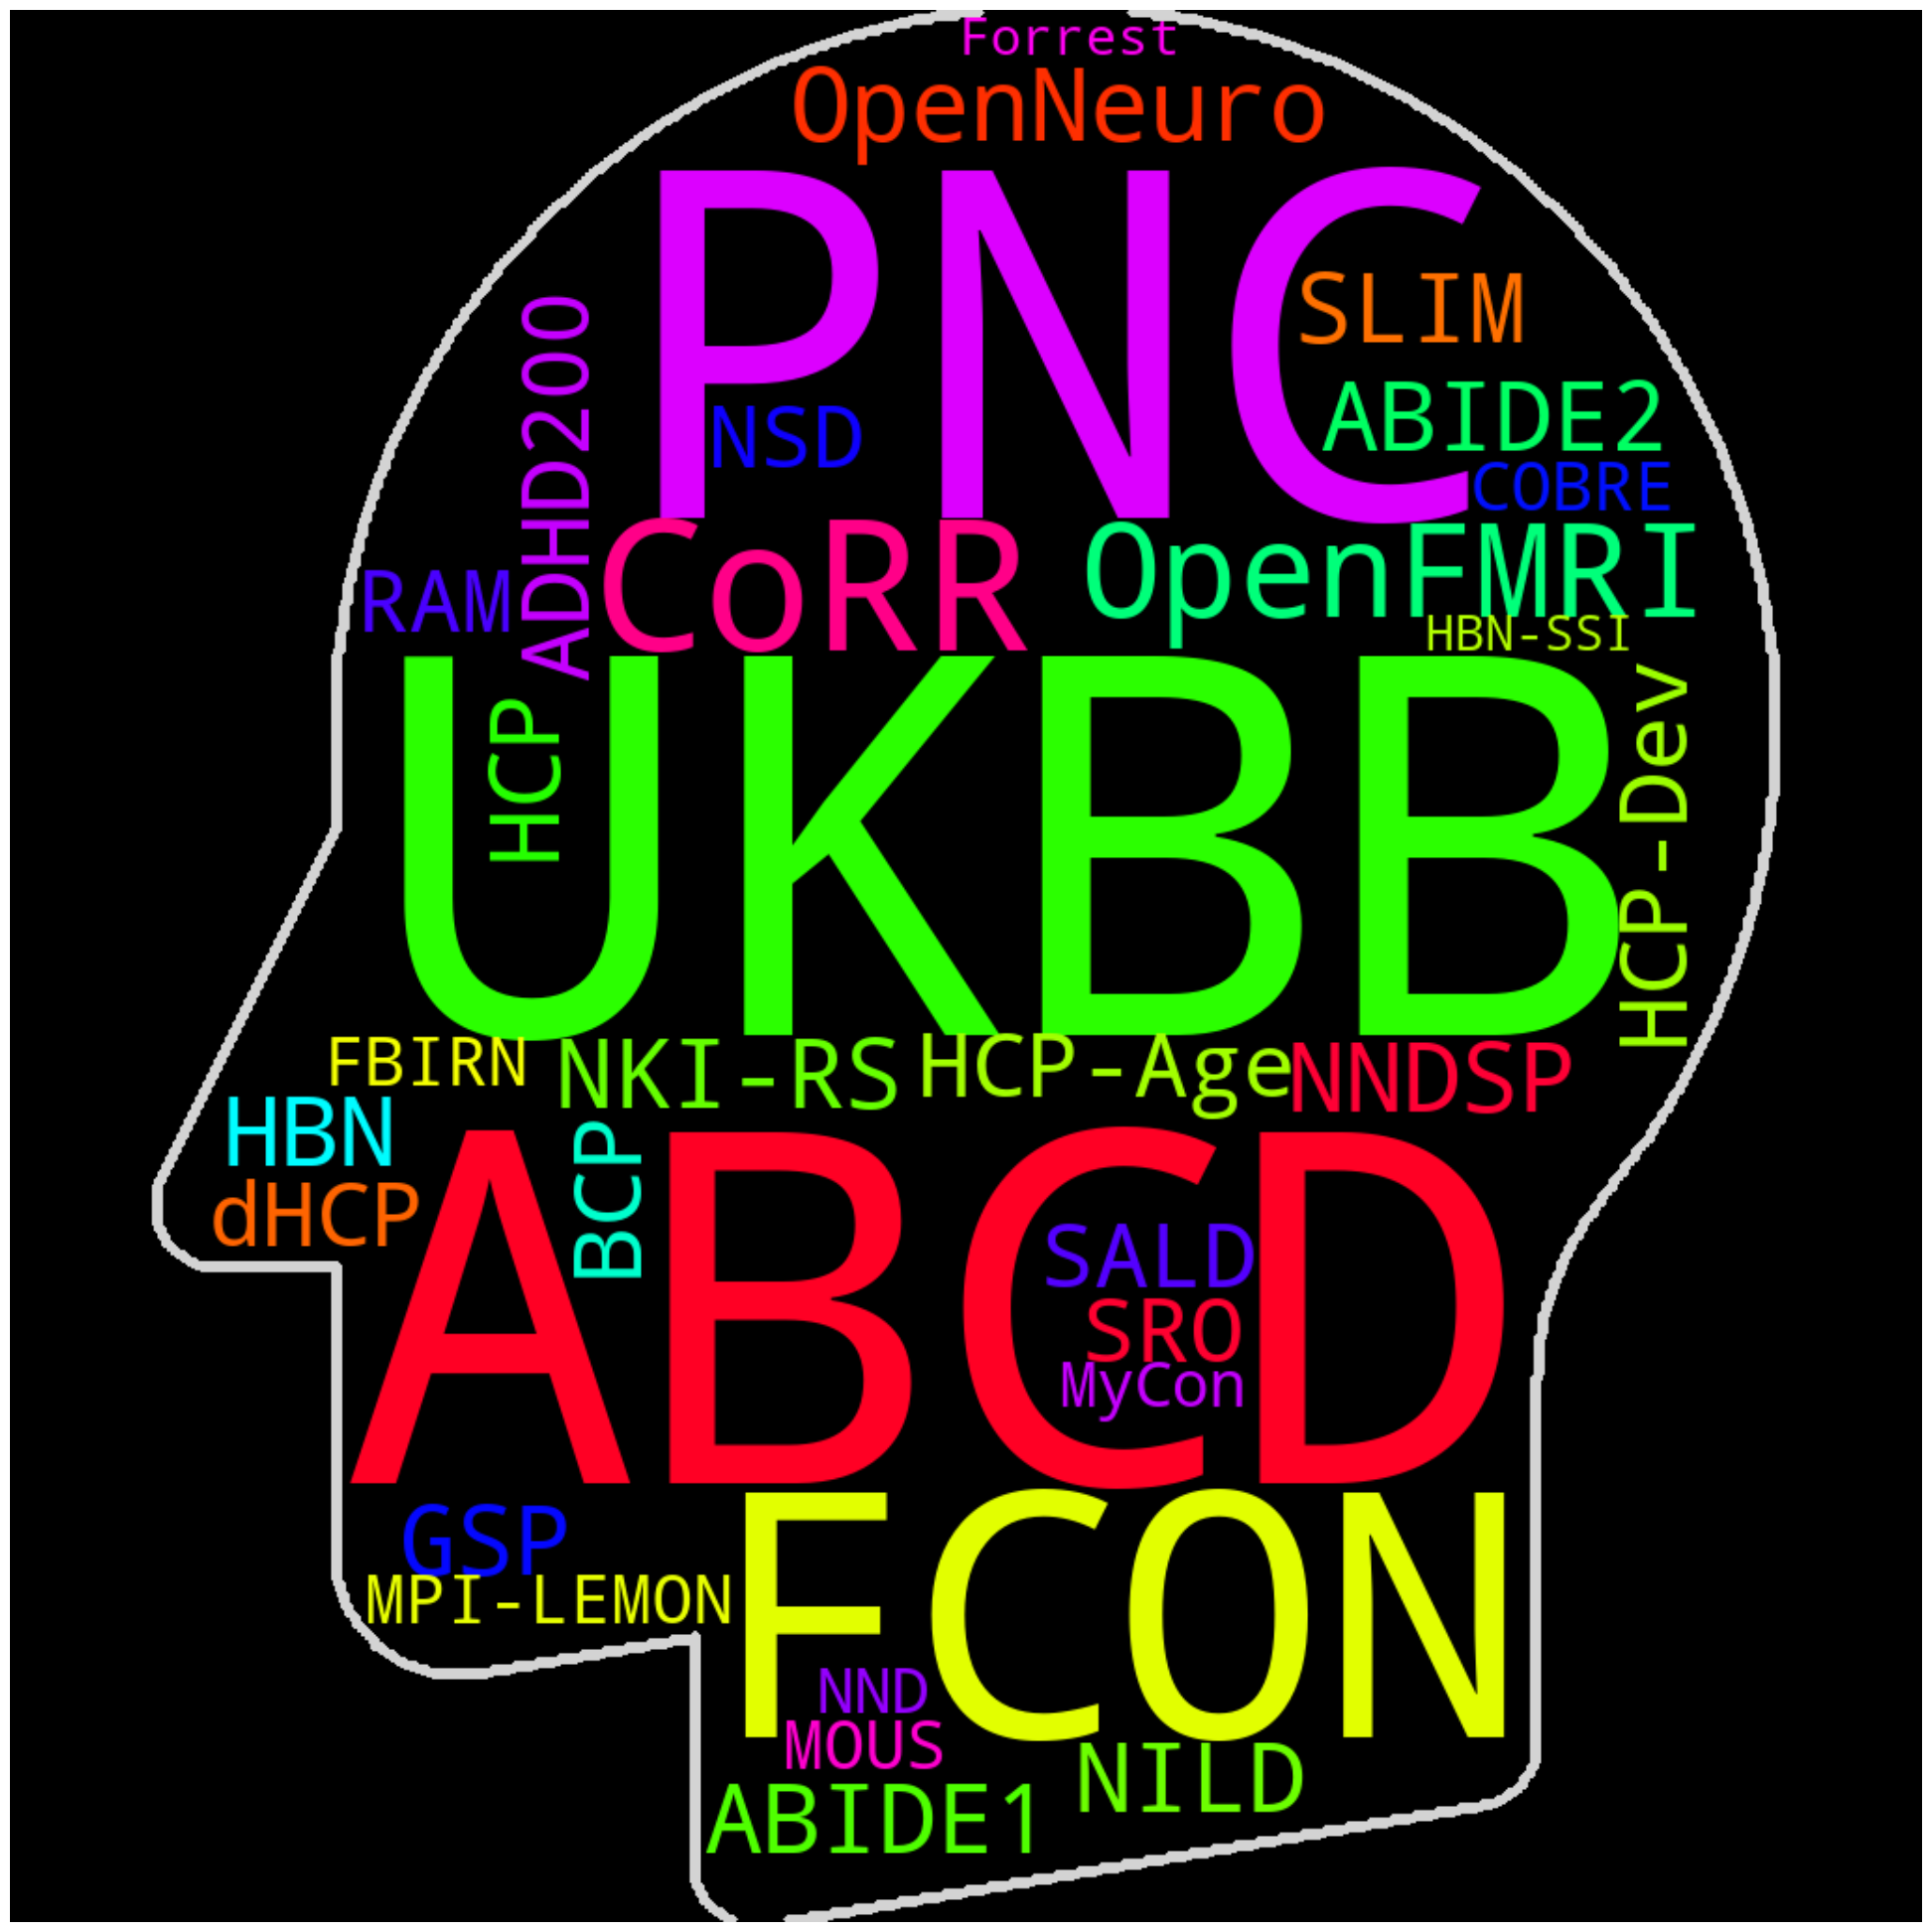

In [19]:
# wordcloud in black bg
wc3_blackbg = WordCloud(background_color='black', scale=2, colormap='hsv', contour_color='lightgrey', contour_width=5,
                        mask=head_mask).generate_from_frequencies(studyid_samplesize)
plt.figure(figsize=(25, 25))
plt.imshow(wc3_blackbg, interpolation='bilinear')
plt.axis('off')
plt.show()

wc3_blackbg.to_file('wordclouds/studyid_sampleSize_blackbg_logscale.png')  # saving to file